2047


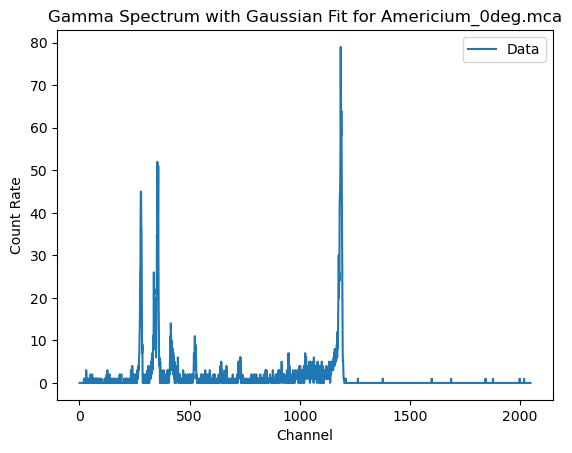

2047


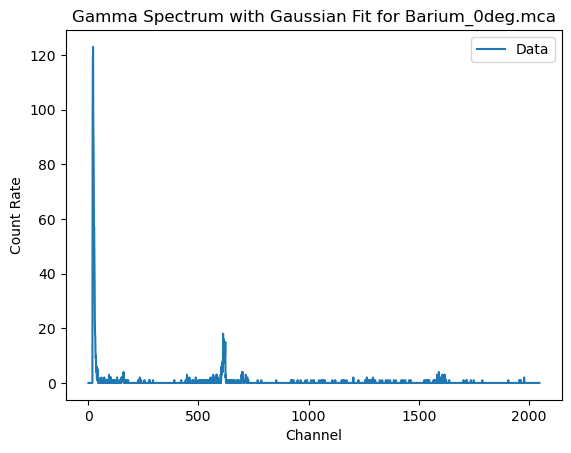

2047


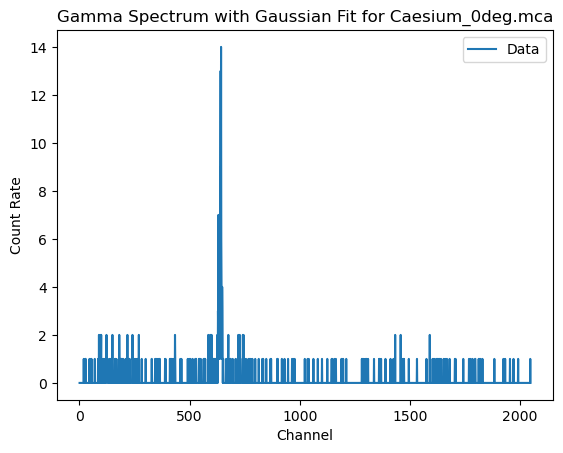

2047


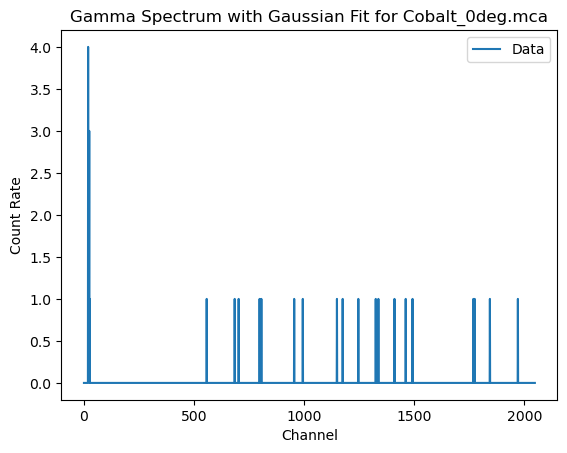

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Folder containing .spe files
folder_path = r"C:\Users\surya\Desktop\SpaceDetectorLabGroup2-main\gamma"

# Channel range (full range)
channels = np.arange(1, 2048, 1)

def read_file(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file.readlines():
            data.append(line.strip())
        data = data[data.index('<<DATA>>') + 2 : data.index('<<END>>')]
        data = np.asarray(data).astype('i')
    return data

# Loop through each .spe file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.mca'):  # Process only .Spe files
        
        file_path = os.path.join(folder_path, file_name)
        
        # Read data
        sample = read_file(file_path)
        print(len(sample))
        # Plot data and Gaussian fit
        plt.plot(channels, sample, label="Data")
        plt.xlabel("Channel")
        plt.ylabel("Count Rate")
        plt.title(f"Gamma Spectrum with Gaussian Fit for {file_name}")
        plt.legend()
        plt.show()

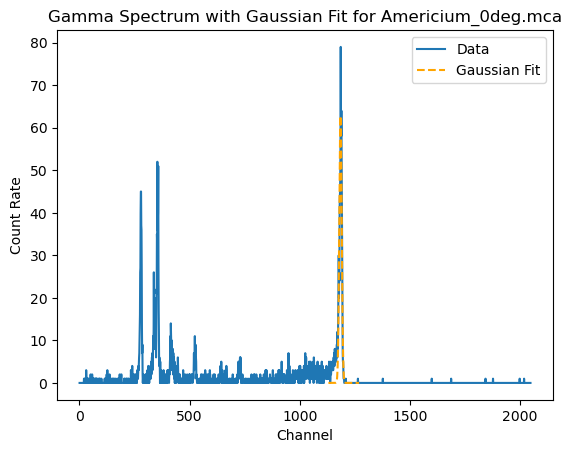

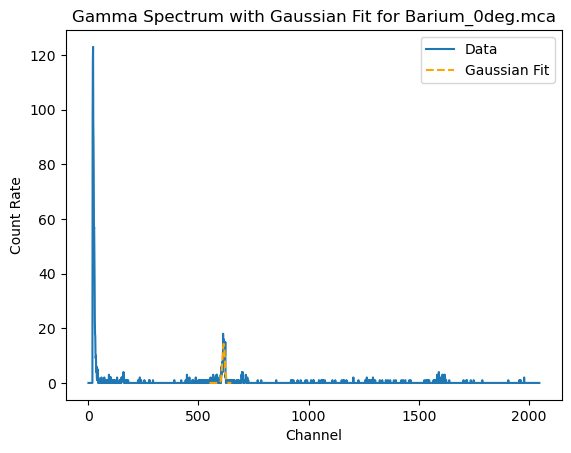

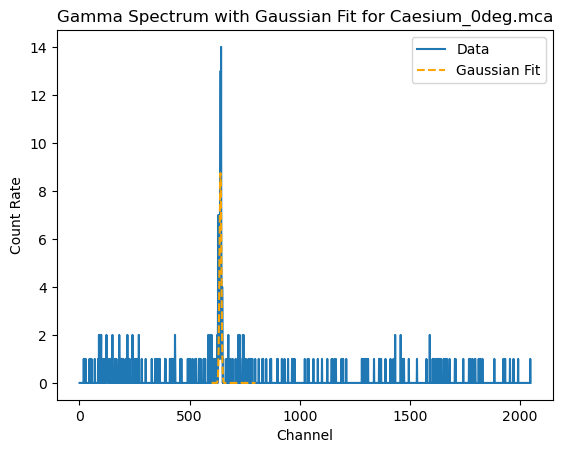

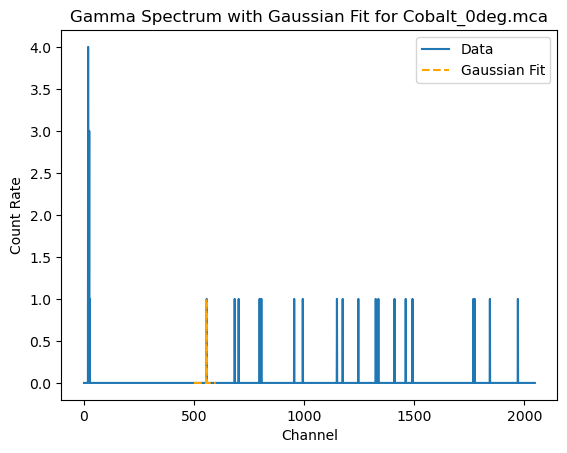

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Folder containing .spe files
folder_path = r"C:\Users\surya\Desktop\SpaceDetectorLabGroup2-main\gamma"

# Channel range (full range)
channels = np.arange(1, 2048, 1)

def read_file(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file.readlines():
            data.append(line.strip())
        data = data[data.index('<<DATA>>') + 2 : data.index('<<END>>')]
        data = np.asarray(data).astype('i')
    return data

# Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))

# Configuration dictionary for specific files
# You can adjust 'peak_center', 'fit_range', and 'initial_guess' as needed for each spectrum
config = {
    "Americium": {
        "peak_center": 1200,
        "fit_range": 70,
        "initial_guess": [27000, 1200, 20]
    },
    "Barium": {
        "peak_center": 600,    # Center of peak for Barium
        "fit_range": 50,       # Range around the peak to fit
        "initial_guess": [6000, 600, 100]  # Initial guess: amplitude, center, sigma
    },

    "Caesium": {
        "peak_center": 700,
        "fit_range": 100,
        "initial_guess": [800, 700, 15]
    },
    "Cobalt": {
        "peak_center": 550,
        "fit_range": 50,
        "initial_guess": [150, 550, 20]
    }
}

# Loop through each .spe file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.mca'):  # Process only .Spe files
        
        # Check if the file matches any of the keys in config
        matched_config = None
        for key in config.keys():
            if key in file_name:
                matched_config = config[key]
                break
        
        # If no specific configuration is found, skip this file
        if matched_config is None:
            print(f"No configuration found for {file_name}, skipping...")
            continue

        file_path = os.path.join(folder_path, file_name)
        
        # Read data
        sample = read_file(file_path)
        
        # Extract the data subset for fitting based on configuration
        peak_center = matched_config["peak_center"]
        fit_range = matched_config["fit_range"]
        fit_channels = np.arange(peak_center - fit_range, peak_center + fit_range)
        subset_data = sample[peak_center - fit_range : peak_center + fit_range]
        
        # Get initial guess from configuration
        initial_guess = matched_config["initial_guess"]
        
        # Fit Gaussian on the subset
        try:
            popt, _ = curve_fit(gaussian, fit_channels, subset_data, p0=initial_guess)
        except RuntimeError:
            print(f"Could not fit Gaussian for {file_name}")
            continue

        # Plot data and Gaussian fit
        plt.plot(channels, sample, label="Data")
        plt.plot(fit_channels, gaussian(fit_channels, *popt), label="Gaussian Fit", linestyle="--", color="orange")
        plt.xlabel("Channel")
        plt.ylabel("Count Rate")
        plt.title(f"Gamma Spectrum with Gaussian Fit for {file_name}")
        plt.legend()
        plt.show()

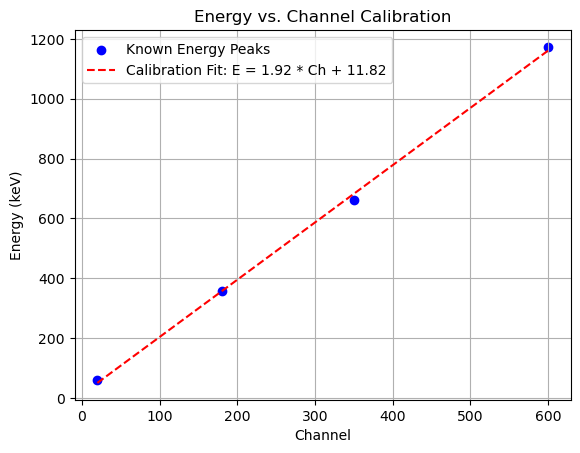

Calibration equation: Energy (keV) = 1.92 * Channel + 11.82


In [12]:
energies = {
    "Americium": 59.5,   # keV
    "Barium": 356.0,    
    "Caesium": 661.7,   
    "Cobalt": 1173.2,  
}

# Corresponding peak channels determined from Gaussian fits
channels = {
    "Americium": 20,   
    "Barium": 180,     
    "Caesium": 350,   
    "Cobalt": 600,  
}

# Flattening the data to have lists of energies and channels for fitting
energy_values = []
channel_values = []

for isotope, energy in energies.items():
    if isinstance(energy, list):
        energy_values.extend(energy)
        channel_values.extend(channels[isotope])
    else:
        energy_values.append(energy)
        channel_values.append(channels[isotope])

# Perform linear fit (Energy = m * Channel + c)
coefficients = np.polyfit(channel_values, energy_values, 1)
m, c = coefficients

fitted_energies = np.polyval(coefficients, channel_values)

# Plot the calibration graph
plt.scatter(channel_values, energy_values, color='blue', label='Known Energy Peaks')
plt.plot(channel_values, fitted_energies, color='red', linestyle='--', label=f'Calibration Fit: E = {m:.2f} * Ch + {c:.2f}')
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.title("Energy vs. Channel Calibration")
plt.legend()
plt.grid()
plt.show()

print(f"Calibration equation: Energy (keV) = {m:.2f} * Channel + {c:.2f}")
